In [1]:
import pandas as pd
from keras.utils import load_img, img_to_array
from numpy import expand_dims
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
import cv2
import os
import xml.etree.ElementTree as ET


<h1>Object detection using pre-trained YOLO

In [2]:
!git clone https://github.com/experiencor/keras-yolo3.git
%cd keras-yolo3
!pip install --upgrade pip
!pip install -r requirements.txt
!pip install opencv-contrib-python==4.5.5.64

fatal: destination path 'keras-yolo3' already exists and is not an empty directory.
/content/keras-yolo3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached absl-py-0.9.0.tar.gz (104 kB)
  Preparing metadata (setup.py) ... done
  Using cached astor-0.8.1-py2.py3-none-any.whl (27 kB)
  Using cached gast-0.2.2.tar.gz (10 kB)
  Preparing metadata (setup.py) ... done
  Using cached google_pasta-0.1.8-py3-none-any.whl (57 kB)
  Using cached grpcio-1.26.0.tar.gz (15.4 MB)
  Preparing metadata (setup.py) ... done
  Using cached h5py-2.10.0.tar.gz (301 kB)
  Preparing metadata (setup.py) ... done
  Using cached Keras-2.3.1-py2.py3-none-any.whl (377 kB)
  Using cached Keras_Applications-1.0.8-py3-none-any.whl (50 kB)
  Using cached Keras_Preprocessing-1.1.0-py2.py3-none-any.whl (41 kB)
  Using cached Markdown-3.1.1-py2.py3-none-any.whl 

In [3]:
!git clone https://github.com/ml4py/dataset-iiit-pet.git

fatal: destination path 'dataset-iiit-pet' already exists and is not an empty directory.


In [4]:
# Define the paths to the dataset files
annotations_path = "dataset-iiit-pet/annotations/list.txt"
labels_path = "dataset-iiit-pet/annotations/trainval.txt"

# Read the breed annotations file
with open(annotations_path, "r") as f:
    breeds = [line.strip() for line in f.readlines()]

# Read the labels file
df_labels = pd.read_csv(labels_path, delim_whitespace=True, header=None, names=["filename", "species", "breed"],)

# Define a function to convert the breed label to cat/dog category label
def get_category_label(species):
    if species == 1:
        return "cat"
    elif species == 2:
        return "dog"
    else:
        return None

# Apply the function to the breed labels to get the category labels
df_labels["category"] = df_labels["species"].apply(get_category_label)

df_labels.head()

,filename,species,breed,category
Abyssinian_100,1,1,1,cat
Abyssinian_101,1,1,1,cat
Abyssinian_102,1,1,1,cat
Abyssinian_103,1,1,1,cat
Abyssinian_104,1,1,1,cat


<h2>Download pretranied weights

In [5]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2023-04-20 04:02:38--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights.2’

yolov3.weights.2    100%[===================>] 236.52M  21.2MB/s    in 9.4s    

2023-04-20 04:02:48 (25.2 MB/s) - ‘yolov3.weights.2’ saved [248007048/248007048]



<h2>Run the model

In [6]:
!python yolo3_one_file_to_detect_them_all.py -w yolo3.weights -i dog.jpg
!python yolo3_one_file_to_detect_them_all_modified.py -w yolov3.weights -i dog.jpg

2023-04-20 04:02:51.345507: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Traceback (most recent call last):
  File "/content/keras-yolo3/yolo3_one_file_to_detect_them_all.py", line 5, in <module>
    from keras.layers.merge import add, concatenate
ModuleNotFoundError: No module named 'keras.layers.merge'
2023-04-20 04:03:00.729247: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
loading weights of convolution #0
loading weights of convolution #1
loading weights of convolution #2
loading weights of convolution #3
no convolution #4
loading weights of convolution #5
loading weights of convolution #6
loading weights of convolution #7
no convolution #8
loading weights of convolution #9
loading weights of convolution #10
no convolution #11
loading weights of convolution #12
loading weights of convolution #13
loading weights of convolution #14
no convolution #15
loading weights of convolution #1

In [7]:
from yolo3_one_file_to_detect_them_all_modified import *

In [8]:
# weights_path = weights 
# image_path = args.image

net_h, net_w = 416, 416
obj_thresh, nms_thresh = 0.5, 0.45
anchors = [[116,90, 156,198, 375,326], [30,61, 62,45, 59,119], [10,13, 16,30, 32,23]]
labels = ["person", "bicycle", "car", "motorbike", "aeroplane", "bus", "train", "truck", "boat", "traffic light", "fire hydrant", "stop sign", "parking meter", "bench", "bird", "cat",
          "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe", \
"backpack", "umbrella", "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard", "sports ball", "kite", "baseball bat", "baseball glove", "skateboard", "surfboard", "tennis racket", "bottle", "wine glass", "cup", "fork", "knife", "spoon", "bowl", "banana", "apple", "sandwich", "orange", "broccoli", "carrot", "hot dog", "pizza", "donut", "cake", "chair", "sofa", "pottedplant", "bed", "diningtable", "toilet", "tvmonitor", "laptop", "mouse", \
"remote", "keyboard", "cell phone", "microwave", "oven", "toaster", "sink", "refrigerator", "book", "clock", "vase", "scissors", "teddy bear", "hair drier", "toothbrush"]

yolov3 = make_yolov3_model()

weight_reader = WeightReader('yolov3.weights')
weight_reader.load_weights(yolov3)

loading weights of convolution #0
loading weights of convolution #1
loading weights of convolution #2
loading weights of convolution #3
no convolution #4
loading weights of convolution #5
loading weights of convolution #6
loading weights of convolution #7
no convolution #8
loading weights of convolution #9
loading weights of convolution #10
no convolution #11
loading weights of convolution #12
loading weights of convolution #13
loading weights of convolution #14
no convolution #15
loading weights of convolution #16
loading weights of convolution #17
no convolution #18
loading weights of convolution #19
loading weights of convolution #20
no convolution #21
loading weights of convolution #22
loading weights of convolution #23
no convolution #24
loading weights of convolution #25
loading weights of convolution #26
no convolution #27
loading weights of convolution #28
loading weights of convolution #29
no convolution #30
loading weights of convolution #31
loading weights of convolution #32

In [9]:
# save the model to file
yolov3.save('yolov3.h5')

In [10]:
def load_image_pixels(filename, shape):
    # load the image to get its shape
    image = load_img(filename)
    width, height = image.size
    # load the image with the required size
    image = load_img(filename, target_size=shape)
    # convert to numpy array
    image = img_to_array(image)
    # scale pixel values to [0, 1]
    image = image.astype('float32')
    image /= 255.0
    # add a dimension so that we have one sample
    image = expand_dims(image, 0)
    return image, width, height

def draw_boxes_plot(filename, boxes, labels, obj_thresh):
    data = plt.imread(filename)
    plt.imshow(data)
    ax = plt.gca()
    for i in range(len(boxes)):
        box = boxes[i]
        label_str = ''
        label = -1
        for j in range(len(labels)):
            if box.classes[j] > obj_thresh:
                label_str += labels[j]
                label = j
                print(labels[j] + ': ' + str(box.classes[j]*100) + '%')
        if label >= 0:
          y1, x1, y2, x2 = box.ymin, box.xmin, box.ymax, box.xmax
          width, height = x2 - x1, y2 - y1
          rect = Rectangle((x1, y1), width, height, fill=False, color='red')
          ax.add_patch(rect)
          lab = "%s (%.3f)" % (labels[label], 100* box.classes[label])
          plt.text(x1, y1, lab, color='red')
    # show the plot
    plt.show()


1/1 [==============================] - 4s 4s/step
[(1, 13, 13, 255), (1, 26, 26, 255), (1, 52, 52, 255)]
dog: 98.95195364952087%
person: 82.51016736030579%


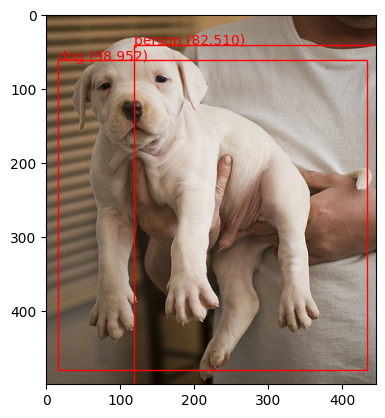

In [11]:
# define the expected input shape for the model
input_w, input_h = 416, 416
# define our new photo
photo_filename = '/content/keras-yolo3/dataset-iiit-pet/images/american_bulldog_209.jpg'
# load and prepare image
image, image_w, image_h = load_image_pixels(photo_filename, (net_w, net_w))


# make prediction
yolos = yolov3.predict(image)
# summarize the shape of the list of arrays
print([a.shape for a in yolos])

# define the anchors
anchors = [[116,90, 156,198, 373,326], [30,61, 62,45, 59,119], [10,13, 16,30, 33,23]]
# define the probability threshold for detected objects
boxes = list()
for i in range(len(yolos)):
        # decode the output of the network
    boxes += decode_netout(yolos[i][0], anchors[i], obj_thresh, nms_thresh, net_h, net_w)

    # correct the sizes of the bounding boxes
correct_yolo_boxes(boxes, image_h, image_w, net_h, net_w)

# suppress non-maximal boxes
do_nms(boxes, nms_thresh)


draw_boxes_plot(photo_filename, boxes, labels, obj_thresh)

In [39]:
import numpy as np

def compute_ap(ground_truth, predictions, iou_threshold):
    """Compute the average precision (AP) for a single image and IoU threshold.
    
    Arguments:
    ground_truth -- list of ground truth bounding box coordinates (xmin, ymin, xmax, ymax) for each object in the image
    predictions -- list of predicted bounding box coordinates (xmin, ymin, xmax, ymax) and confidence scores for each object in the image
    iou_threshold -- IoU threshold for considering a predicted bounding box correct
    
    Returns:
    ap -- average precision for the image and IoU threshold
    """
    # Sort the predicted bounding boxes by confidence score in descending order
    predictions = sorted(predictions, key=lambda x: x[1], reverse=True)
    
    # Initialize the true positives and false positives lists
    tp = np.zeros(len(predictions))
    fp = np.zeros(len(predictions))
    
    # Initialize the number of ground truth objects
    n_objects = len(ground_truth)

    # Initialize the precision and recall lists
    precision = np.zeros(len(predictions))
    recall = np.zeros(len(predictions))
    
    # Loop over the predicted bounding boxes
    for i in range(len(predictions)):
        # Initialize the maximum IoU and index of the maximum IoU ground truth bounding box
        max_iou = 0
        max_idx = -1
        
        # Loop over the ground truth bounding boxes
        for j in range(n_objects):
            # Compute the IoU between the predicted and ground truth bounding boxes
            iou = calculate_iou(predictions[i][:-1], ground_truth[j])
            
            # Check if the IoU is greater than the current maximum and above the threshold
            if iou > max_iou and iou >= iou_threshold:
                max_iou = iou
                max_idx = j
        
        # If a ground truth bounding box was matched to the predicted bounding box with the maximum IoU
        if max_idx >= 0:
            # Check if the ground truth bounding box has already been matched to another predicted bounding box
            if not np.any(tp[:i]):
                # Mark the predicted bounding box as a true positive
                tp[i] = 1
            else:
                # Mark the predicted bounding box as a false positive
                fp[i] = 1
        else:
            # Mark the predicted bounding box as a false positive
            fp[i] = 1
        
        # Compute the precision and recall up to this predicted bounding box
        precision[i] = np.sum(tp[:i+1]) / (np.sum(tp[:i+1]) + np.sum(fp[:i+1]))
        recall[i] = np.sum(tp[:i+1]) / n_objects
    # Compute the average precision by integrating over the precision-recall curve
    ap = 0
    for i in range(1, len(predictions)):
        ap += (recall[i] - recall[i-1]) * precision[i]
    
    return ap

def calculate_iou(box1, box2):
    """Calculate the IoU (intersection over union) between two bounding boxes."""
    xmin1, ymin1, xmax1, ymax1 = box1
    xmin2, ymin2, xmax2, ymax2 = box2
    
    inter_area = max(0, min(xmax1, xmax2) - max(xmin1, xmin2)) * max(0, min(ymax1, ymax2) - max(ymin1, ymin2))
    union_area = (xmax1 - xmin1) * (ymax1 - ymin1) + (xmax2 - xmin2) * (ymax2 - ymin2) - inter_area

    iou = inter_area / union_area

    return iou


In [38]:

# Compute the AP and mAP for each IoU threshold
for iou_threshold in iou_thresholds:
    aps = []
    for i in range(len(predictions)):
        # Compute the AP for this image and IoU threshold
        ap = compute_ap(ground_truth[i], predictions[i], iou_threshold)
        aps.append(ap)
    mAP = np.mean(aps)
    print(f'mAP@{iou_threshold:.2f}: {mAP:.4f}')

1
1
mAP@0.25: 0.0002
1
1
mAP@0.50: 0.0002
1
1
mAP@0.75: 0.0001
1
1
mAP@0.95: 0.0000


In [28]:
# Define the path to the directory containing the pet images and annotations
data_dir = '/content/keras-yolo3/dataset-iiit-pet'

# Define the IoU thresholds at which to compute mAP
iou_thresholds = [0.25, 0.5, 0.75, 0.95]
# Amount of sample to use
num_values= 2
# Load the model and compute predictions for each image
# Load the ground truth bounding box coordinates for each image
ground_truth = []
predictions = []
for img_file in os.listdir(data_dir+'/annotations/xmls')[:num_values]:
    if img_file.endswith('.xml'):
        # Load the image and preprocess it for the model
        img = cv2.imread(os.path.join(data_dir, 'images', img_file.replace("xml", "jpg")))
        print(img_file.replace("xml", "jpg"))
        image_h, image_w, _ = img.shape
        try:
          img = preprocess_input(img, net_h, net_w)
          # Make a prediction on the image
          yolos = yolov3.predict(img)
          prediction = list()
          for i in range(len(yolos)):
                  # decode the output of the network
              prediction += decode_netout(yolos[i][0], anchors[i], obj_thresh, nms_thresh, net_h, net_w)
              # correct the sizes of the bounding boxes
          
          correct_yolo_boxes(prediction, image_h, image_w, net_h, net_w)

          # suppress non-maximal boxes
          do_nms(prediction, nms_thresh)
          aux = []
          for i in range(len(prediction)):
            aux.append([prediction[i].xmin, prediction[i].ymin, prediction[i].xmax, prediction[i].ymax, prediction[i].get_score()])
          predictions.append(aux)
        except:
          print("Image cannot be preprocessed")
        
        # Load the corresponding XML annotation file
        # ann_file = os.path.join(data_dir, 'annotations', img_file)
        tree = ET.parse(os.path.join(data_dir, 'annotations','xmls' , img_file))
        root = tree.getroot()
        print(img_file)
        # Extract the bounding box coordinates for each object
        bboxes = []
        for obj in root.findall('object'):
            bbox = obj.find('bndbox')
            xmin = int(bbox.find('xmin').text)
            ymin = int(bbox.find('ymin').text)
            xmax = int(bbox.find('xmax').text)
            ymax = int(bbox.find('ymax').text)
            bboxes.append([xmin, ymin, xmax, ymax])
        ground_truth.append(bboxes)
        
# Compute the AP and mAP for each IoU threshold
for iou_threshold in iou_thresholds:
    aps = []
    for i in range(len(predictions)):
        # Compute the AP for this image and IoU threshold
        ap = compute_ap(ground_truth[i], predictions[i], iou_threshold)
        aps.append(ap)
    mAP = np.mean(aps)
    print(f'mAP@{iou_threshold:.2f}: {mAP:.4f}')

Se han truncado las últimas 5000 líneas del flujo de salida.
0.0
0.010894941634241245
0.00864677907479464
0.008473843493298746
0.009727626459143969
0.0
0.012105490704712495
0.12434754729079833
0.0
0.03833405389825623
0.04232598357111976
0.0012681942643032137
0.0
0.0
0.0
0.0
0.0
0.00028772838440512156
0.016990640748740102
0.018158236057068743
0.016904453091223518
0.016544170629773744
0.018099807509983624
0.011648424163307464
0.0
0.0
0.008272085314886872
0.008862948551664505
0.008877359850122496
0.0
0.06989479752125667
0.0670990056204064
0.05152039198731806
0.07756160830090791
0.039198731805735694
0.0
0.0
0.0016861219195849547
0.0014267185473411154
0.002060815679492722
0.0012681942643032137
0.0
0.0
0.019368785127539992
0.01837440553393861
0.01694768698659749
0.000875891784982694
0.0
0.0
0.009079118028534372
0.008127972330306961
0.004818862404268136
0.07493875198155354
0.06614785992217899
0.0
0.0
0.16469043728439547
0.0
0.019344202234841547
0.0
0.0011673151750972762
0.0015564202334630351


IndexError: ignored

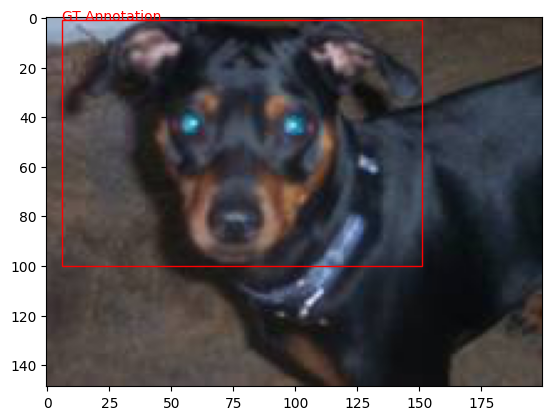

In [49]:
def draw_GT_box_plot(filename, xmin, ymin, xmax, ymax):
    data = plt.imread(filename)
    plt.imshow(data)
    ax = plt.gca()
    y1, x1, y2, x2 = ymin, xmin, ymax, xmax
    width, height = x2 - x1, y2 - y1
    rect = Rectangle((x1, y1), width, height, fill=False, color='red')
    ax.add_patch(rect)
    plt.text(x1, y1, "GT Annotation", color='red')
    # show the plot
    plt.show()

draw_GT_box_plot(os.path.join(data_dir, 'images', img_file.replace("xml", "jpg")), ground_truth[num_values-1][0][0], ground_truth[num_values-1][0][1],
                 ground_truth[num_values-1][0][2], ground_truth[num_values-1][0][3])

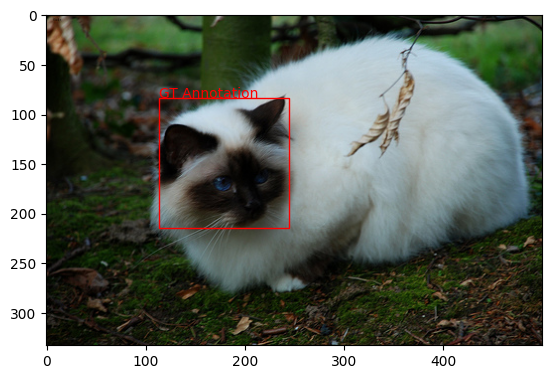

In [51]:
draw_GT_box_plot(os.path.join(data_dir, 'images', img_file.replace("xml", "jpg")), ground_truth[num_values-1][0][0], ground_truth[num_values-1][0][1],
                 ground_truth[num_values-1][0][2], ground_truth[num_values-1][0][3])

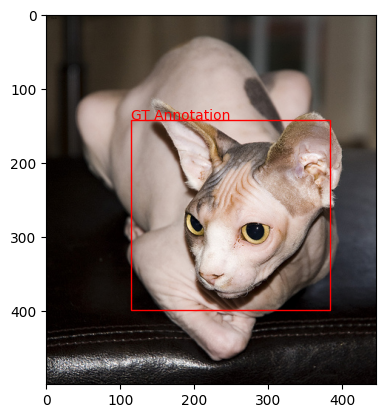

In [41]:
draw_GT_box_plot(os.path.join(data_dir, 'images', img_file.replace("xml", "jpg")), ground_truth[num_values-1][0][0], ground_truth[num_values-1][0][1],
                 ground_truth[num_values-1][0][2], ground_truth[num_values-1][0][3])